| Algorithm                                                                          | EVAL METHOD |          |          |
|------------------------------------------------------------------------------------|-------------|----------|----------|
|                                                                                    | Jaccard     | f1 score | LOG LOSS |
| KNN(k=2 is most accurate for test set but k=7 is most accurate for training model. | 0.7         | 0.73     | x        |
| DTC                                                                                | 0.759       | 0.671    | x        |
| SVM(rbf best kernel)                                                               | 0.796       | .76      | x        |
| Logistic Regression                                                                | 0.74        | 0.66     | 0.56     |

<h2>hello! I have used numpy arrays for all four algorithms, so there's internal consistency.
please let me know if i can answer any questions, and thank you for grading!</h2>

In [435]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [436]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-10-11 16:46:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-10-11 16:46:00 (1.07 MB/s) - ‘loan_train.csv’ saved [23101/23101]



<a href='#LRT'>SKIP TO LOGISTIC REGRESSION:TRAINING</a>

<a href='#LRTE'>SKIP TO LOGISTIC REGRESSION:TESTING</a>

<a href='#SVM'>SKIP TO SVM TRAINING</a>

<a href='#SVMTE'>SKIP TO SVM TESTING</a>

<a href='#DTC'>SKIP TO DECISION TREE CLASSIFIER TRAINING</a>

<a href='#KNNT'>SKIP TO KNN TRAINING </a>

<a href='#KNNE'>SKIP TO KNN TESTING</a>

In [4]:
df = pd.read_csv('loan_train.csv')

In [316]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [317]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [318]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1],inplace=True)
df['loan_status']=df['loan_status']

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [319]:
df[['Principal','terms','age','Gender','education']].head()
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [320]:
X = np.asarray(Feature)
X = X.astype('float')
X

array([[1000.,   30.,   45., ...,    0.,    1.,    0.],
       [1000.,   30.,   33., ...,    1.,    0.,    0.],
       [1000.,   15.,   27., ...,    0.,    0.,    1.],
       ...,
       [ 800.,   15.,   39., ...,    0.,    0.,    1.],
       [1000.,   30.,   28., ...,    0.,    0.,    1.],
       [1000.,   30.,   26., ...,    0.,    0.,    1.]])

In [321]:
y = np.asarray(df['loan_status'])
y[0:5]

array([0, 0, 0, 0, 0])

In [322]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

<a id = 'LRT'><h2>LOGISTIC REGRESSION:TRAINING</h2></a>

In [323]:
#TRAINING
#X,y from loan_train were split into training and testing internally for model creation and preliminary assessment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [325]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [326]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.4965762 , 0.5034238 ],
       [0.54793889, 0.45206111],
       [0.69185868, 0.30814132],
       [0.65740572, 0.34259428],
       [0.67974106, 0.32025894],
       [0.68319463, 0.31680537],
       [0.51169815, 0.48830185],
       [0.52176927, 0.47823073],
       [0.65740572, 0.34259428],
       [0.5065944 , 0.4934056 ],
       [0.66193294, 0.33806706],
       [0.50337769, 0.49662231],
       [0.75108093, 0.24891907],
       [0.6580905 , 0.3419095 ],
       [0.56248211, 0.43751789],
       [0.74239503, 0.25760497],
       [0.47642812, 0.52357188],
       [0.69549722, 0.30450278],
       [0.49833637, 0.50166363],
       [0.6804029 , 0.3195971 ],
       [0.55723012, 0.44276988],
       [0.50589815, 0.49410185],
       [0.48649667, 0.51350333],
       [0.52796502, 0.47203498],
       [0.59055306, 0.40944694],
       [0.49153558, 0.50846442],
       [0.48901585, 0.51098415],
       [0.62542353, 0.37457647],
       [0.49581577, 0.50418423],
       [0.74700365, 0.25299635],
       [0.

In [327]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6857142857142857

In [328]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        55
           1       0.18      0.13      0.15        15

   micro avg       0.69      0.69      0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [329]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5772287609479654

<a id='LRTE'> LOGISTIC REGRESSION:TESTING AND EVALUATION </a>

In [330]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-10-11 22:21:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0.001s  

2020-10-11 22:21:15 (6.31 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [331]:
#the real testing data set is called df2
#it has the arrays X2,y2,yhat2
df2 = pd.read_csv('loan_test.csv')
df2.head()
df2.shape
df2['due_date'] = pd.to_datetime(df2['due_date'])
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
df2.head()
df2['dayofweek'] = df2['effective_date'].dt.dayofweek
df2['weekend'] = df2['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df2.head()
df2['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df2['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1],inplace=True)
df2['loan_status']=df2['loan_status']
df2.head()
df2[['Principal','terms','age','Gender','education']].head()
Feature2 = df2[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(df2['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2
Feature2.shape
Feature2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [332]:
X2 = np.asarray(Feature2)
X2 = X2.astype('float')
X2
y2 = np.asarray(df2['loan_status'])
y2
X2

array([[1000.,   30.,   50.,    1.,    0.,    1.,    0.,    0.],
       [ 300.,    7.,   35.,    0.,    1.,    0.,    0.,    0.],
       [1000.,   30.,   43.,    1.,    1.,    0.,    1.,    0.],
       [1000.,   30.,   26.,    0.,    1.,    0.,    0.,    1.],
       [ 800.,   15.,   29.,    0.,    1.,    1.,    0.,    0.],
       [ 700.,   15.,   33.,    0.,    1.,    0.,    1.,    0.],
       [1000.,   15.,   24.,    0.,    1.,    0.,    0.,    1.],
       [1000.,   30.,   32.,    0.,    1.,    1.,    0.,    0.],
       [ 800.,   15.,   27.,    1.,    1.,    0.,    0.,    1.],
       [1000.,   15.,   37.,    0.,    1.,    0.,    0.,    1.],
       [ 800.,   15.,   24.,    0.,    1.,    0.,    1.,    0.],
       [ 300.,    7.,   35.,    0.,    1.,    0.,    0.,    1.],
       [1000.,   30.,   31.,    0.,    1.,    1.,    0.,    0.],
       [1000.,   30.,   37.,    1.,    1.,    0.,    0.,    1.],
       [1000.,   30.,   37.,    1.,    1.,    0.,    1.,    0.],
       [1000.,   30.,   3

In [333]:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [334]:
yhat2 = LR.predict(X2)
yhat2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [335]:
yhat2_prob = LR.predict_proba(X2)
yhat2_prob[0:5]

array([[0.75476534, 0.24523466],
       [0.59163677, 0.40836323],
       [0.571912  , 0.428088  ],
       [0.49449887, 0.50550113],
       [0.54439106, 0.45560894]])

In [336]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y2, yhat2)

0.7407407407407407

In [337]:
from sklearn.metrics import log_loss
log_loss(y2, yhat2_prob)

0.5672153379912981

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y2,yhat2))
print (classification_report(y2, yhat2))

[[39  1]
 [13  1]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        40
           1       0.50      0.07      0.12        14

   micro avg       0.74      0.74      0.74        54
   macro avg       0.62      0.52      0.49        54
weighted avg       0.69      0.74      0.66        54



<a id='SVM'>SUPPORT VECTOR MACHINE:TRAINING</a>

In [338]:
#svm
X_svm = X
y_svm = y
X2_svm = X2
y2_svm = y2
yhatsvm
yhat2svm


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [339]:
#train_test split
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split( X_svm, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_trainsvm.shape,  y_trainsvm.shape)
print ('Test set:', X_testsvm.shape,  y_testsvm.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [340]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainsvm, y_trainsvm)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [341]:
yhatsvm = clf.predict(X_testsvm)
yhatsvm

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [342]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_testsvm, yhatsvm))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.36      0.27      0.31        15

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [343]:
from sklearn.metrics import f1_score
f1_score(y_testsvm, yhatsvm, average='weighted')

0.7275882012724117

In [344]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testsvm, yhatsvm)

0.7428571428571429

<a id = 'SVMTE'> SVM TESTING </a>

In [345]:
yhat2svm = clf.predict(X2_svm)
yhat2svm

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [346]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y2_svm, yhat2svm))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        40
           1       0.80      0.29      0.42        14

   micro avg       0.80      0.80      0.80        54
   macro avg       0.80      0.63      0.65        54
weighted avg       0.80      0.80      0.76        54



In [121]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y2, yhat2svm)

0.7962962962962963

<a id = 'DTC'>DECISION TREE CLASSIFIER:TRAINING</a>

In [388]:
#X,y,X_train,y_train, X_test, y_test, X2,y2,yhat2
from sklearn.tree import DecisionTreeClassifier
X_dtc = X
y_dtc = y
X2_dtc = X2
y2_dtc = y2

In [348]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTC

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [349]:
X_traindtc, X_testdtc, y_traindtc, y_testdtc = train_test_split( X_dtc, y_dtc, test_size=0.2, random_state=4)
print ('Train set:', X_traindtc.shape,  y_traindtc.shape)
print ('Test set:', X_testdtc.shape,  y_testdtc.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [350]:
DTC.fit(X_traindtc,y_traindtc)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [351]:
yhatdtc= DTC.predict(X_testdtc)
yhatdtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [389]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testdtc, yhatdtc))
#bool statement
yhatdtc==y_testdtc
acc=np.mean(yhatdtc==y_testdtc)
print(acc)

DecisionTrees's Accuracy:  0.7857142857142857
0.7857142857142857


<a id ='DTCT'>DTC TESTING</a>

In [391]:
yhat2_dtc= DTC.predict(X2_dtc)
yhat2_dtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [392]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y2_dtc, yhat2dtc))
from sklearn.metrics import f1_score
f1_score(y2_dtc,yhat2dtc, average = 'weighted')

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        40
           1       1.00      0.07      0.13        14

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



0.6717642373556352

In [355]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y2_dtc, yhat2_dtc)

0.7592592592592593

<a id='KNNT'>KNN:TRAINING</a>

In [356]:
X_KNN = X
y_KNN = y
X2_KNN = X2
y2_KNN = y2

In [393]:
from sklearn.model_selection import train_test_split
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split( X_KNN, y_KNN, test_size=0.2, random_state=4)
print ('Train set:', X_trainKNN.shape,  y_trainKNN.shape)
print ('Test set:', X_testKNN.shape,  y_testKNN.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [394]:
from sklearn.neighbors import KNeighborsClassifier

In [429]:
#select k
k = 2
#Train Model and Predict 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainKNN,y_trainKNN)
neigh
yhatKNN = neigh.predict(X_testKNN)
y_KNN[0:5]
#check accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainKNN, neigh.predict(X_trainKNN)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testKNN, yhatKNN))

Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7714285714285715


In [430]:
#check k's for optimal accuracy with train/test set
#PLEASE NOTE: a k of 6 or 7 yields the highest accuracy in the array here: (.785)
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh= KNeighborsClassifier(n_neighbors = n).fit(X_trainKNN,y_trainKNN)
    yhatKNN=neigh.predict(X_testKNN)
    mean_acc[n-1] = metrics.accuracy_score(y_testKNN, yhatKNN)

    
    std_acc[n-1]=np.std(yhatKNN==y_testKNN)/np.sqrt(yhatKNN.shape[0])

mean_acc


array([0.67142857, 0.77142857, 0.71428571, 0.77142857, 0.75714286,
       0.78571429, 0.78571429, 0.77142857, 0.75714286])

In [431]:
jaccard_similarity_score(yhatKNN, y_testKNN)

0.7571428571428571

In [432]:
f1_score(yhatKNN,y_testKNN, average='weighted')
print(classification_report(yhatKNN,y_testKNN))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        58
           1       0.33      0.42      0.37        12

   micro avg       0.76      0.76      0.76        70
   macro avg       0.60      0.62      0.61        70
weighted avg       0.78      0.76      0.77        70



<a id ='KNNE'>KNN TESTING</a>

In [433]:
#select k FOR REAL TEST SET
yhat2_KNN = neigh.predict(X2_KNN)
yhat2_KNN

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [434]:
jaccard_similarity_score(yhat2_KNN,y2_KNN)

0.7037037037037037

In [416]:
print (confusion_matrix(yhat2_KNN,y2_KNN))
print(classification_report(yhat2_KNN,y2_KNN))

[[35 11]
 [ 5  3]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.21      0.38      0.27         8

   micro avg       0.70      0.70      0.70        54
   macro avg       0.54      0.57      0.54        54
weighted avg       0.78      0.70      0.73        54



In [417]:
#check k's for optimal accuracy with real test set
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainKNN,y_trainKNN)
    yhat2_KNN=neigh.predict(X2_KNN)
    mean_acc[n-1] = metrics.accuracy_score(y2_KNN, yhat2_KNN)

    
    std_acc[n-1]=np.std(yhat2_KNN==y2_KNN)/np.sqrt(yhat2_KNN.shape[0])

mean_acc

array([0.68518519, 0.74074074, 0.7037037 , 0.72222222, 0.7037037 ,
       0.68518519, 0.66666667, 0.7037037 , 0.7037037 ])

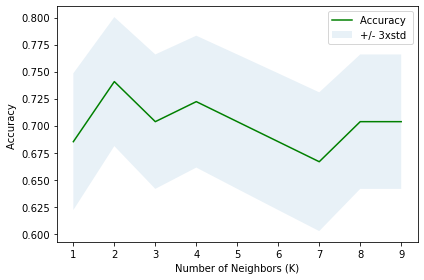

The best accuracy was with 0.7407407407407407 with k= 2


In [418]:
#plot the optimal k for the train/test set
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 